# EDA #

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [135]:
import scipy.stats as stats

In [136]:
pd.set_option('display.max_columns', 100)
pokemon = pd.read_csv('data/pokemon_cleaned.csv').drop('Unnamed: 0', axis=1)

In [137]:
# This is the data frame that contains all the pokemon information. This will be used to explore more 
# generally different attributes of Pokemon
print(pokemon.shape)
pokemon.head()

(800, 12)


,id,name,type1,type2,hp,atk,def,spatk,spdef,spd,gen,legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## General Pokemon EDA ##

### Pokemon Types ###

In [138]:
# match Pokemon types to colors from the games
color_dict = {'Normal':'#A8A77A', 'Fire':'#EE8130', 'Water':'#6390F0', 'Electric':'#FFF200', 'Grass':'#7AC74C',
              'Ice':'#96D9D6', 'Fighting':'#C22E28', 'Poison':'#A33EA1', 'Ground':'#E2BF65', 'Flying':'#A98FF3', 
              'Psychic': '#F95587', 'Bug':'#A6B91A', 'Rock':'#B6A136', 'Ghost':'#735797', 'Dragon':'#6F35FC',
              'Dark':'#705746', 'Steel':'#B7B7CE', 'Fairy':'#D685AD'}

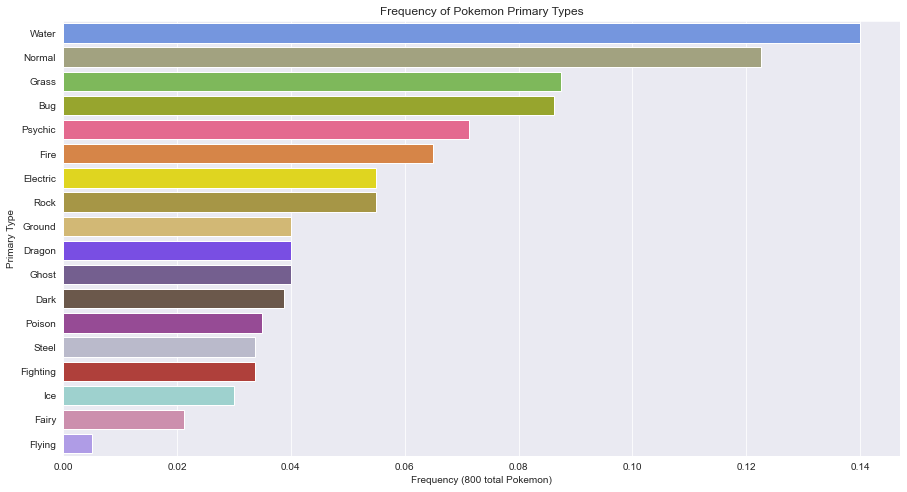

In [139]:
# Primary types from most to least common
p_types = pokemon.type1.value_counts(normalize=True)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.barplot(p_types.values, p_types.index, palette=color_dict)
plt.ylabel('Primary Type')
plt.xlabel('Frequency (800 total Pokemon)')
plt.title('Frequency of Pokemon Primary Types')
plt.show()

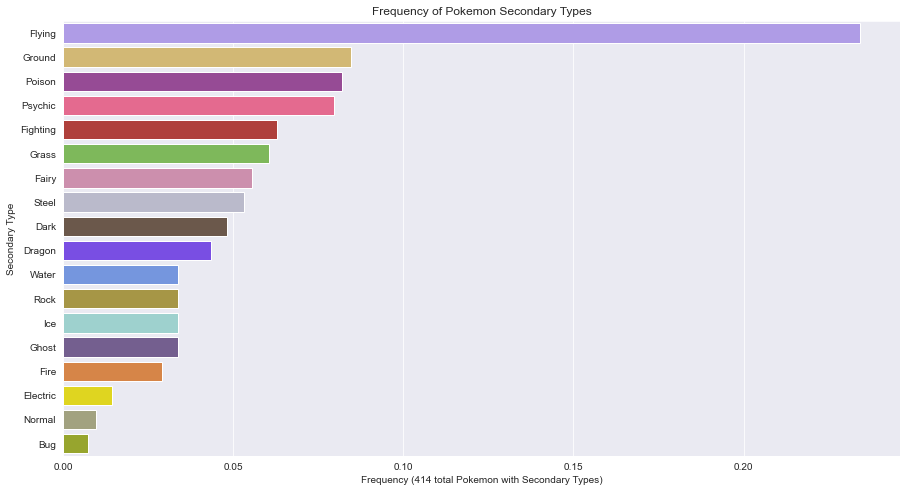

In [140]:
# Secondary Types from most to least common
s_types = pokemon.type2.value_counts(normalize=True)
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.barplot(s_types.values, s_types.index, palette=color_dict)
plt.ylabel('Secondary Type')
plt.xlabel('Frequency (414 total Pokemon with Secondary Types)')
plt.title('Frequency of Pokemon Secondary Types')
plt.show()

In [161]:
# Create new column for different type combinations
pokemon['type_combo'] = np.where(pokemon.type2.notnull(), pokemon.type1+'-'+pokemon.type2, np.nan)

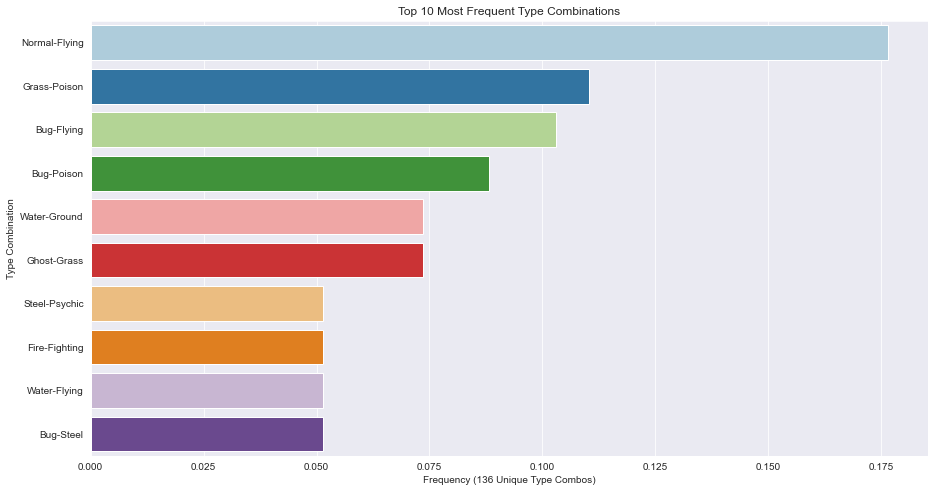

In [162]:
# Top 10 Most Common Type Combinations
combos = pokemon.type_combo.value_counts()/pokemon.type_combo.nunique()
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.barplot(combos.values[0:10], combos.index[0:10], palette='Paired')
plt.ylabel('Type Combination')
plt.xlabel('Frequency (136 Unique Type Combos)')
plt.title('Top 10 Most Frequent Type Combinations')
plt.show()

The most common primary type is Water making up almost about 14% of all Pokemon. We can see that least common primary type is Flying. However, we can also see that Flying is the most common secondary type making up about 24% of two-type Pokemon. Further, we can wee that the most common type combination is Normal-Flying, making about 17.5% of all unique type combinations. In fact, Flying appears as a secondary type in 3 of the top 10 common type combinations for Pokemon. 

In [143]:
# New column to determine if a Pokemon has a secondary
pokemon['two_type'] = np.where(pokemon.type2.notnull(), 1, 0)
pokemon.two_type.value_counts(normalize=True)

1    0.5175
0    0.4825
Name: two_type, dtype: float64

In [144]:
pokemon.head()

,id,name,type1,type2,hp,atk,def,spatk,spdef,spd,gen,legendary,type_combo,two_type
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Grass-Poison,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Grass-Poison,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Grass-Poison,1
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,Grass-Poison,1
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,NaN,0


### Pokemon Stat Totals ##

In [145]:
# Calculate a Pokemon's stat total
pokemon['stat_total'] = pokemon.iloc[:, 4:10].sum(axis=1)

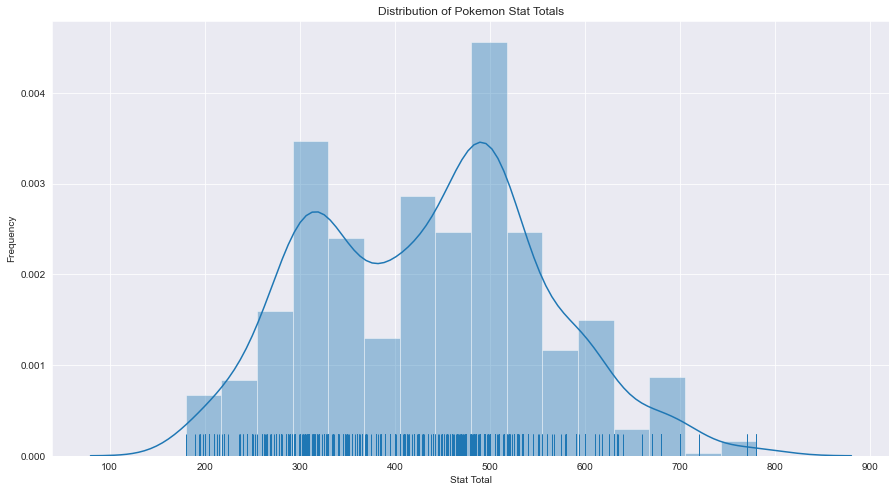

In [146]:
# Distribution of Pokemon Stat Totals
plt.figure(figsize=(15,8))
sns.distplot(pokemon.stat_total, rug=True)
plt.title('Distribution of Pokemon Stat Totals')
plt.xlabel('Stat Total')
plt.ylabel('Frequency')
plt.show()

### Are two-type Pokemon stronger? ###

It seems that there is a roughly equal proportion of Pokemon with secondary types and those without. Some questions that arise from this analysis:
- Are there advantages to having a secondary type? 
- Are two-type Pokemon stronger than one-type Pokemon?

In [147]:
pokemon.head()

,id,name,type1,type2,hp,atk,def,spatk,spdef,spd,gen,legendary,type_combo,two_type,stat_total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Grass-Poison,1,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Grass-Poison,1,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,Grass-Poison,1,525
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,Grass-Poison,1,625
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,NaN,0,309


In [148]:
pokemon.groupby('two_type').mean()

,id,hp,atk,def,spatk,spdef,spd,gen,legendary,stat_total
two_type,,,,,,,,,,
0,384.458549,67.766839,74.525907,67.585492,68.284974,67.974093,65.878238,3.230570,0.064767,412.015544
1,415.456522,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628,0.096618,456.628019


There does appear to be a difference in the mean of all stats between one-type and two-type Pokemon. We'll conduct a two-sample t-test with $\alpha = 0.05$ on `stat_total` to check if this difference is significant. 

- $H_{0}: \mu_{1} = \mu_{2}$
- $H_{A}: \mu_{1} < \mu_{2}$

In [149]:
one_type = pokemon[pokemon.two_type == 0]
two_type = pokemon[pokemon.two_type == 1]
stats.ttest_ind(two_type.stat_total, one_type.stat_total)

Ttest_indResult(statistic=5.345970873144629, pvalue=1.1749035008828668e-07)

Because we conducted a one-sided t-test we must divide our pvalue by 2. Since $\frac{p}{2} < \alpha$ and $t>0$, we reject the null hypothesis. We conclude that two-type Pokemon are stronger than one-type Pokemon. This may be an important feature to include during the modeling process. 

### Which Pokemon type is strongest? ###

In [150]:
mean_stats = pokemon.groupby('type1').mean().sort_values('stat_total', ascending=False)
mean_stats.drop(['id', 'gen', 'legendary', 'two_type'], axis=1, inplace=True)
mean_stats

,hp,atk,def,spatk,spdef,spd,stat_total
type1,,,,,,,
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,550.531250
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,487.703704
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,485.000000
Psychic,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,475.947368
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,458.076923
Rock,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,453.750000
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,445.741935
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,443.409091
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,439.562500


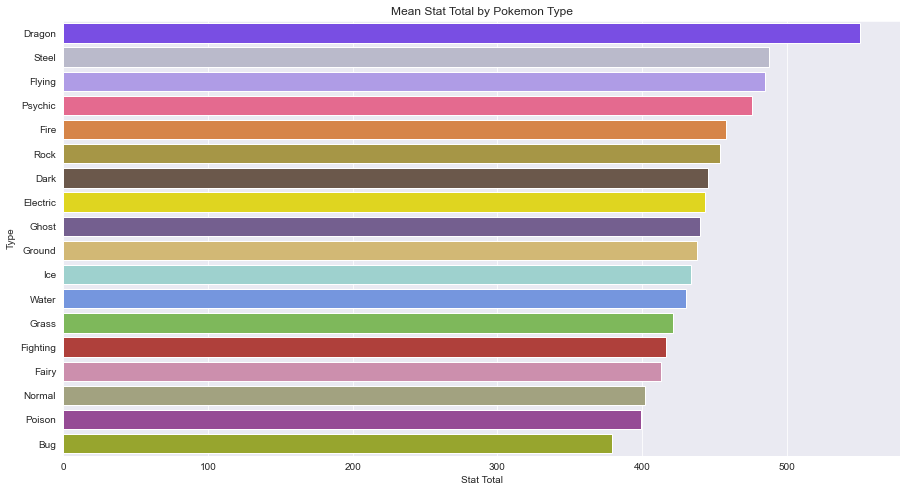

In [151]:
plt.figure(figsize=(15,8))
sns.barplot(mean_stats.stat_total.values, mean_stats.stat_total.index, palette=color_dict)
plt.title('Mean Stat Total by Pokemon Type')
plt.xlabel('Stat Total')
plt.ylabel('Type')
plt.show()

Dragon is by far the strongest type. It is the only type whose mean `stat_total` breaks the 500 mark. Further, of the 6 stats, it has the highest `hp`, `atk`, and `spdef`. And it comes second in `spatk`. Perhaps, having Dragon as a primary or secondary type is a good predictor for victory in battle.

It is important to note that while Flying type appears to be the second strongest type, there are only 4 Pokemon with Flying as their primary type, 2 of which are legendary and the other 2 have Dragon as their secondary type. 

### Legendary vs Mega Pokemon ###

Legendary Pokemon and mega Pokemon are two very strong classifications of Pokemon. 
- Is it the case that they are equally matched in power? Or is one classification stronger than the other?

In [152]:
pokemon['legendary'] = np.where(pokemon.legendary==True, 1, 0)
pokemon['mega'] = np.where(((pokemon.name.str.startswith('Mega')) | (pokemon.name.str.startswith('Primal'))), 1, 0)

In [153]:
regulars = pokemon[(pokemon.legendary==0) & (pokemon.mega==0)]
megas = pokemon[(pokemon.legendary==0) & (pokemon.mega==1)]
legendaries = pokemon[(pokemon.legendary==1) & (pokemon.mega==0)]
mega_legs = pokemon[(pokemon.legendary==1) & (pokemon.mega==1)]

In [154]:
len(regulars), len(megas), len(legendaries), len(mega_legs)

(692, 43, 57, 8)

There are more legendary Pokemon than mega Pokemon. Surprisingly, some Pokemon fall under both categories. 

In [155]:
regulars.stat_total.mean(), megas.stat_total.mean(), legendaries.stat_total.mean(), mega_legs.stat_total.mean()

(405.96098265895955, 598.3023255813954, 621.9298245614035, 747.5)

We can see that legendary Pokemon are by far the strongest class of Pokemon. They have an average `stat_total` of 627. Mega Pokemon are the second strongest class of Pokemon with an average `stat_total` of 598. Regular Pokemon are considerably weaker than either of these two classes with an average `stat_total` of 406. The 6 Pokemon that both mega and legendary Pokemon are unquestionably the strongest Pokemon in existence. Perhaps they will always win during a Pokemon battle. 

Briefly, let us verify that the difference in `stat_total` is statistically significant between legendary and mega Pokemon. We'll conduct a two-sample t-test with $\alpha=0.05$ to check:

- $H_{0}: \mu_{L} = \mu_{M}$
- $H_{A}: \mu_{L} \neq \mu_{M}$


In [156]:
stats.ttest_ind(legendaries.stat_total, megas.stat_total)

Ttest_indResult(statistic=2.402317310505353, pvalue=0.018175129559866193)

Since our p-value  < $\alpha$, we can reject the null hypothese and conclude that there is a statistically significant difference in the `stat_total` between legendary and mega Pokemon.

In [157]:
# create column for Pokemon that are both mega and legendary
pokemon['mega_leg'] = np.where(((pokemon.mega==1) & (pokemon.legendary==1)), 1, 0)

### Conclusions ###

Through this analysis, we saw two-type Pokemon are significanlt stronger than one-type Pokemon. We also saw that, on average, Dragon-type Pokemon have the highest `stat_total`, making them the strongest overall type. However, Dragon-type Pokemon are not very common. Perhaps more interesting is that Psychic-type are 4th strongest on average and are the 5th most common type of Pokemon. This means that you are likely to encounter a Psychic-type Pokemon in battle. On a related note, it is worth noting that the most common types (Water, Normal, Grass, Bug) are also among the weakest. Finally, we saw that legendary Pokemon are much stronger than both regular and mega Pokemon, with regular Pokemon being the weakest. There are 8 Pokemon that are classified as both mega and legendary Pokemon and they are some of the strongest Pokemon in existence. These features will be used when constructing the classification model.

## Reconstructing the Final Data Set with New Features ##

In [653]:
combats = pd.read_csv("data/datasets_2619_4359_combats.csv")
merged = pokemon.merge(combats, left_on='id', right_on='First_pokemon')

In [655]:
df = merged.merge(pokemon, left_on='Second_pokemon', right_on='id')
df = df.sort_values('id_x')
df.head()

,id_x,name_x,type1_x,type2_x,hp_x,atk_x,def_x,spatk_x,spdef_x,spd_x,gen_x,legendary_x,type_combo_x,two_type_x,stat_total_x,mega_x,mega_leg_x,First_pokemon,Second_pokemon,Winner,id_y,name_y,type1_y,type2_y,hp_y,atk_y,def_y,spatk_y,spdef_y,spd_y,gen_y,legendary_y,type_combo_y,two_type_y,stat_total_y,mega_y,mega_leg_y
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,1,679,679,679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,0,NaN,0,495,0,0
3360,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,1,43,43,43,Vulpix,Fire,NaN,38,41,40,50,65,65,1,0,NaN,0,299,0,0
1832,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,1,162,162,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,0,Dragon-Flying,1,600,0,0
1757,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,1,714,714,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,5,0,Water-Fighting,1,580,0,0
323,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,1,194,1,194,Mareep,Electric,NaN,55,40,40,65,45,35,2,0,NaN,0,280,0,0


In [659]:
original = list(df.columns)

new = ['id_p1','name_p1','type1_p1','type2_p1','hp_p1','atk_p1','def_p1','spatk_p1','spdef_p1','spd_p1','gen_p1',
       'legendary_p1','type_combo_p1', 'two_type_p1', 'stat_total_p1', 'mega_p1', 'mega_leg_p1', 'first_pokemon',
       'second_pokemon','winner', 'id_p2','name_p2','type1_p2','type2_p2','hp_p2','atk_p2','def_p2','spatk_p2',
       'spdef_p2','spd_p2','gen_p2','legendary_p2','type_combo_p2', 'two_type_p2', 'stat_total_p2', 'mega_p2', 
       'mega_leg_p2']

rename = dict(zip(original, new))

df.rename(rename, axis=1, inplace=True)

In [662]:
df['winner_2'] = np.where(df['winner'] == df['id_p1'], 1, 0)

In [663]:
df.drop(['first_pokemon', 'second_pokemon', 'winner'], axis=1, inplace=True)

In [664]:
df.rename({'winner_2':'p1_winner'}, axis=1, inplace=True)

In [666]:
print(df.shape)
df.head()

(50000, 35)


,id_p1,name_p1,type1_p1,type2_p1,hp_p1,atk_p1,def_p1,spatk_p1,spdef_p1,spd_p1,gen_p1,legendary_p1,type_combo_p1,two_type_p1,stat_total_p1,mega_p1,mega_leg_p1,id_p2,name_p2,type1_p2,type2_p2,hp_p2,atk_p2,def_p2,spatk_p2,spdef_p2,spd_p2,gen_p2,legendary_p2,type_combo_p2,two_type_p2,stat_total_p2,mega_p2,mega_leg_p2,p1_winner
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,679,Accelgor,Bug,NaN,80,70,40,100,60,145,5,0,NaN,0,495,0,0,0
3360,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,43,Vulpix,Fire,NaN,38,41,40,50,65,65,1,0,NaN,0,299,0,0,0
1832,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,162,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,0,Dragon-Flying,1,600,0,0,0
1757,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,714,Keldeo Ordinary Forme,Water,Fighting,91,72,90,129,90,108,5,0,Water-Fighting,1,580,0,0,0
323,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,Grass-Poison,1,318,0,0,194,Mareep,Electric,NaN,55,40,40,65,45,35,2,0,NaN,0,280,0,0,1


In [667]:
df.to_csv('data/pokemon_battle_final.csv')